In [1]:
%config Completer.use_jedi=False
from quadratic_rHeston import *

In [150]:
S0 = 100
maturities = np.array([0.05])
strikes = np.array([95, 97, 99, 100, 101, 103, 105])
strikes_dim = len(strikes)
maturities_dim = len(maturities)
logmoneyness = np.log(strikes/S0)
#### Parameters for quadratic rough Heston
# data = np.loadtxt("Data/parameters.txt")
alpha = 0.55
Lambda = 1.2
a = 0.384
b = 0.095
c = 0.0025
Z0 = 0.1
# alpha, Lambda, a, b, c, Z0 = data[30]

qrheston_params = [alpha, Lambda, a, b, c, Z0]
print(qrheston_params)

[0.55, 1.2, 0.384, 0.095, 0.0025, 0.1]


In [151]:
call_prices = []
params = []
n = 25
for i in range(n):
    print(i+1, '/', n)
    alpha = 0.5 + np.random.uniform(0.005, 0.2)

#     a = np.random.uniform(0.1, 0.75)
#     b = np.random.uniform(0.05, 0.5)
#     c = np.random.uniform(0.0001, 0.01)
#     Z0 = np.random.uniform(0.05, 0.3)
#     Lambda = np.random.uniform(0.8, 1.5) ### from the simulation I find that lambda should be in the interval[0.8, 1.5], instead of [0.5, 1.5]
    qrheston_params = [alpha, Lambda, a, b, c, Z0]
    MC = qrHeston(qrheston_params, S0 = S0)
    # call_prices, errors= MC.qrHeston_CallPut(strikes, maturities)
    params.append(qrheston_params)
    call_prices.append(MC.qrHeston_CallPut(strikes, maturities))

1 / 25


  0%|          | 0/61 [00:00<?, ?it/s]

2 / 25


  0%|          | 0/61 [00:00<?, ?it/s]

3 / 25


  0%|          | 0/61 [00:00<?, ?it/s]

4 / 25


  0%|          | 0/61 [00:00<?, ?it/s]

5 / 25


  0%|          | 0/61 [00:00<?, ?it/s]

6 / 25


  0%|          | 0/61 [00:00<?, ?it/s]

7 / 25


  0%|          | 0/61 [00:00<?, ?it/s]

8 / 25


  0%|          | 0/61 [00:00<?, ?it/s]

9 / 25


  0%|          | 0/61 [00:00<?, ?it/s]

10 / 25


  0%|          | 0/61 [00:00<?, ?it/s]

11 / 25


  0%|          | 0/61 [00:00<?, ?it/s]

12 / 25


  0%|          | 0/61 [00:00<?, ?it/s]

13 / 25


  0%|          | 0/61 [00:00<?, ?it/s]

14 / 25


  0%|          | 0/61 [00:00<?, ?it/s]

15 / 25


  0%|          | 0/61 [00:00<?, ?it/s]

16 / 25


  0%|          | 0/61 [00:00<?, ?it/s]

17 / 25


  0%|          | 0/61 [00:00<?, ?it/s]

18 / 25


  0%|          | 0/61 [00:00<?, ?it/s]

19 / 25


  0%|          | 0/61 [00:00<?, ?it/s]

20 / 25


  0%|          | 0/61 [00:00<?, ?it/s]

21 / 25


  0%|          | 0/61 [00:00<?, ?it/s]

22 / 25


  0%|          | 0/61 [00:00<?, ?it/s]

23 / 25


  0%|          | 0/61 [00:00<?, ?it/s]

24 / 25


  0%|          | 0/61 [00:00<?, ?it/s]

25 / 25


  0%|          | 0/61 [00:00<?, ?it/s]

In [152]:
params

[[0.5493876045660854, 1.2, 0.384, 0.095, 0.0025, 0.1],
 [0.6093226907965205, 1.2, 0.384, 0.095, 0.0025, 0.1],
 [0.6255368915883568, 1.2, 0.384, 0.095, 0.0025, 0.1],
 [0.6819414508451416, 1.2, 0.384, 0.095, 0.0025, 0.1],
 [0.6969066200521963, 1.2, 0.384, 0.095, 0.0025, 0.1],
 [0.6770391445489082, 1.2, 0.384, 0.095, 0.0025, 0.1],
 [0.5055600737418738, 1.2, 0.384, 0.095, 0.0025, 0.1],
 [0.5567021718170614, 1.2, 0.384, 0.095, 0.0025, 0.1],
 [0.6550363549052574, 1.2, 0.384, 0.095, 0.0025, 0.1],
 [0.6894897003449622, 1.2, 0.384, 0.095, 0.0025, 0.1],
 [0.6837419087976323, 1.2, 0.384, 0.095, 0.0025, 0.1],
 [0.5115919743656429, 1.2, 0.384, 0.095, 0.0025, 0.1],
 [0.6618733224250488, 1.2, 0.384, 0.095, 0.0025, 0.1],
 [0.5349365636567427, 1.2, 0.384, 0.095, 0.0025, 0.1],
 [0.6090015436348901, 1.2, 0.384, 0.095, 0.0025, 0.1],
 [0.6324324949815316, 1.2, 0.384, 0.095, 0.0025, 0.1],
 [0.6896352979686636, 1.2, 0.384, 0.095, 0.0025, 0.1],
 [0.558575181763304, 1.2, 0.384, 0.095, 0.0025, 0.1],
 [0.6715019

In [153]:
results_iv = []
results_params = []
for i in range(len(call_prices)):
    c = call_prices[i]
    p = params[i]
    try:
        results_iv.append(impliedVols(S0, strikes, maturities, c, r=0.00))
        results_params.append(p)
    except:
        continue
len(results_iv)

18

In [166]:
before = [i[0] for i in results_params]
a_list = sorted(before)
indices = [before.index(i) for i in a_list]
params_sort = [results_params[i] for i in indices]
ivs_sort = [results_iv[i] for i in indices]

In [167]:
to_save = []
for i in range(len(params_sort)):
    to_save.append(params_sort[i]+list(ivs_sort[i]))
len(to_save)

18

In [168]:
to_save

[[0.5055600737418738,
  1.2,
  0.384,
  0.095,
  0.0025,
  0.1,
  0.10156762035212394,
  0.0741631674991349,
  0.056367616817232416,
  0.05250217704375013,
  0.05311500243726237,
  0.064188325167399,
  0.07977658955500906],
 [0.5115919743656429,
  1.2,
  0.384,
  0.095,
  0.0025,
  0.1,
  0.08958192397109054,
  0.06949104421968064,
  0.055239570371929086,
  0.05193693954153927,
  0.05264448304061593,
  0.06299195115484958,
  0.0772068009791226],
 [0.5349365636567427,
  1.2,
  0.384,
  0.095,
  0.0025,
  0.1,
  0.07232724697172657,
  0.06625902832130945,
  0.0539445001856558,
  0.05110930308931479,
  0.051822849361642734,
  0.06189666895435061,
  0.07628933892137288],
 [0.5567021718170614,
  1.2,
  0.384,
  0.095,
  0.0025,
  0.1,
  0.07620133735307968,
  0.06394202915013691,
  0.052928146710367996,
  0.05042553465540817,
  0.05109886801409789,
  0.05972072278458576,
  0.07208693800944281],
 [0.5777482805989653,
  1.2,
  0.384,
  0.095,
  0.0025,
  0.1,
  0.09296147604867405,
  0.067170

In [171]:
# saved_ = saved.copy()
# len(saved_final)
saved_final = [to_save] + saved_final

In [172]:
saved_final[0]

[[0.5055600737418738,
  1.2,
  0.384,
  0.095,
  0.0025,
  0.1,
  0.10156762035212394,
  0.0741631674991349,
  0.056367616817232416,
  0.05250217704375013,
  0.05311500243726237,
  0.064188325167399,
  0.07977658955500906],
 [0.5115919743656429,
  1.2,
  0.384,
  0.095,
  0.0025,
  0.1,
  0.08958192397109054,
  0.06949104421968064,
  0.055239570371929086,
  0.05193693954153927,
  0.05264448304061593,
  0.06299195115484958,
  0.0772068009791226],
 [0.5349365636567427,
  1.2,
  0.384,
  0.095,
  0.0025,
  0.1,
  0.07232724697172657,
  0.06625902832130945,
  0.0539445001856558,
  0.05110930308931479,
  0.051822849361642734,
  0.06189666895435061,
  0.07628933892137288],
 [0.5567021718170614,
  1.2,
  0.384,
  0.095,
  0.0025,
  0.1,
  0.07620133735307968,
  0.06394202915013691,
  0.052928146710367996,
  0.05042553465540817,
  0.05109886801409789,
  0.05972072278458576,
  0.07208693800944281],
 [0.5777482805989653,
  1.2,
  0.384,
  0.095,
  0.0025,
  0.1,
  0.09296147604867405,
  0.067170

In [156]:
# saved_final = [to_save] + saved_final

In [173]:
import json
json.dump(saved_final, open( "fix_parameter_results.json", 'w' ) )

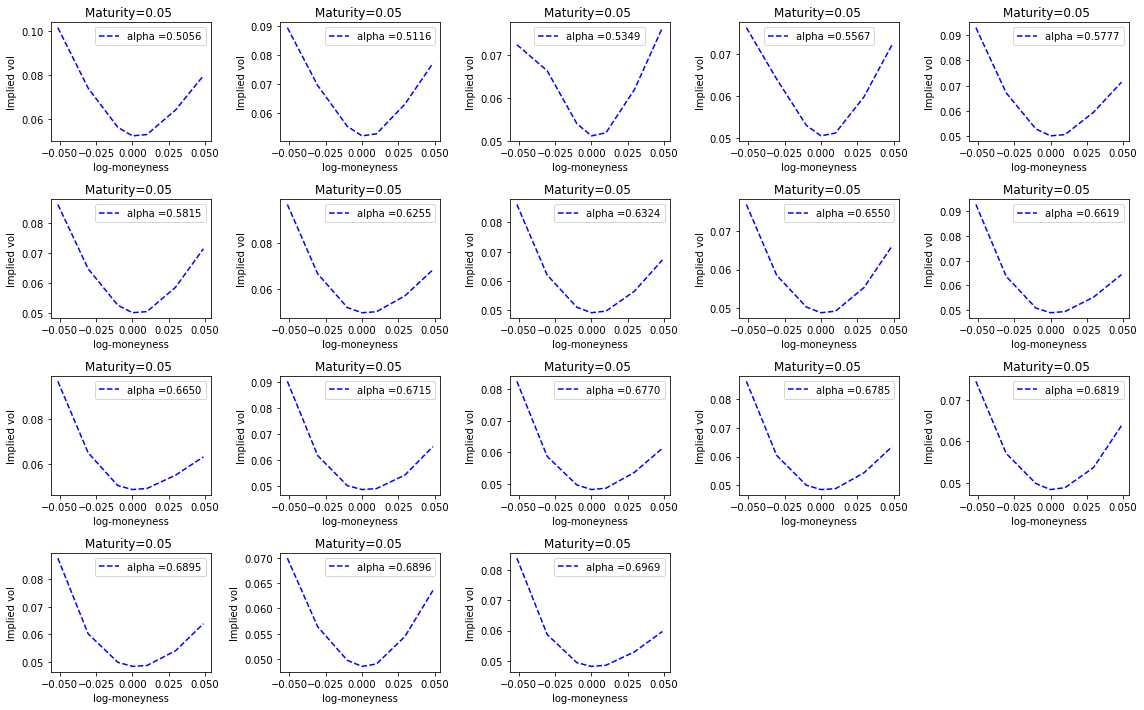

In [158]:
plt.figure(1,figsize=(16,12))
for j in range(len(results_iv)):
    
#     prediction=scale.inverse_transform(modelGEN.predict(X_sample.reshape(1,6))[0])
    plt.subplot(5,5,j+1)
#     print(results_params[j])
    plt.plot(logmoneyness, ivs_sort[j],'b--',label="alpha =%.4f"%params_sort[j][0])
    plt.title("Maturity=%1.2f "%maturities[0])
    plt.xlabel("log-moneyness")
    plt.ylabel("Implied vol")

    plt.legend()
    plt.tight_layout()
plt.show()

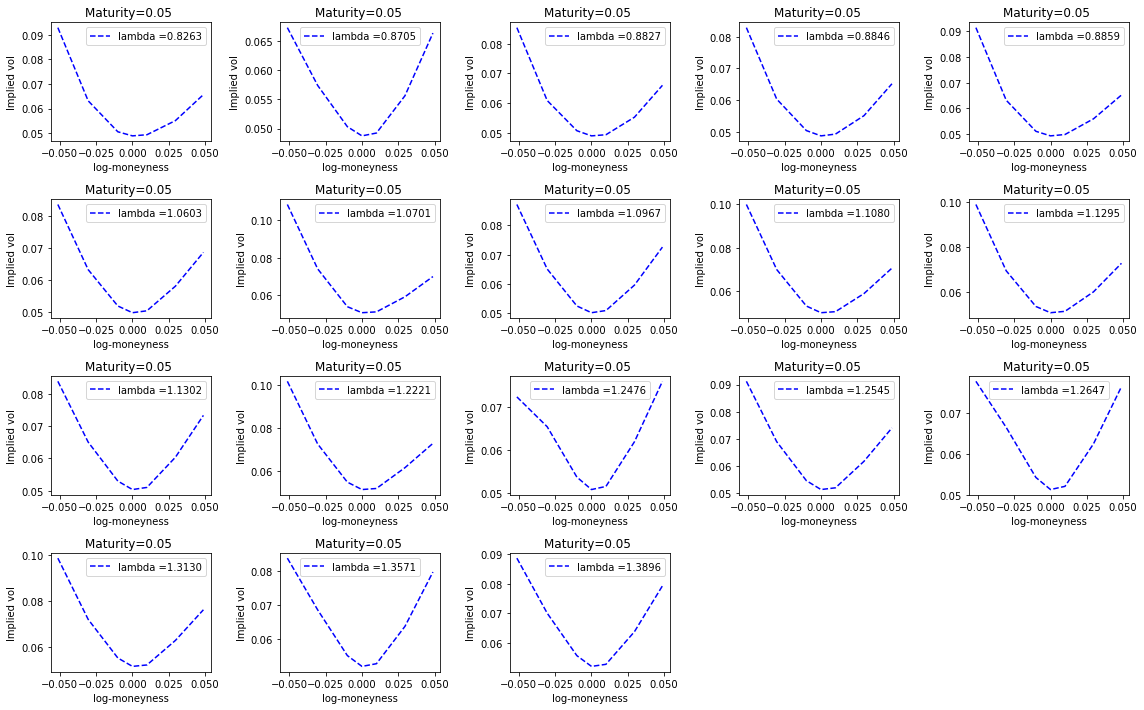

In [148]:
plt.figure(1,figsize=(16,12))
for j in range(len(results_iv)):
    
#     prediction=scale.inverse_transform(modelGEN.predict(X_sample.reshape(1,6))[0])
    plt.subplot(5,5,j+1)
#     print(results_params[j])
    plt.plot(logmoneyness, ivs_sort[j],'b--',label="lambda =%.4f"%params_sort[j][1])
    plt.title("Maturity=%1.2f "%maturities[0])
    plt.xlabel("log-moneyness")
    plt.ylabel("Implied vol")

    plt.legend()
    plt.tight_layout()
plt.show()

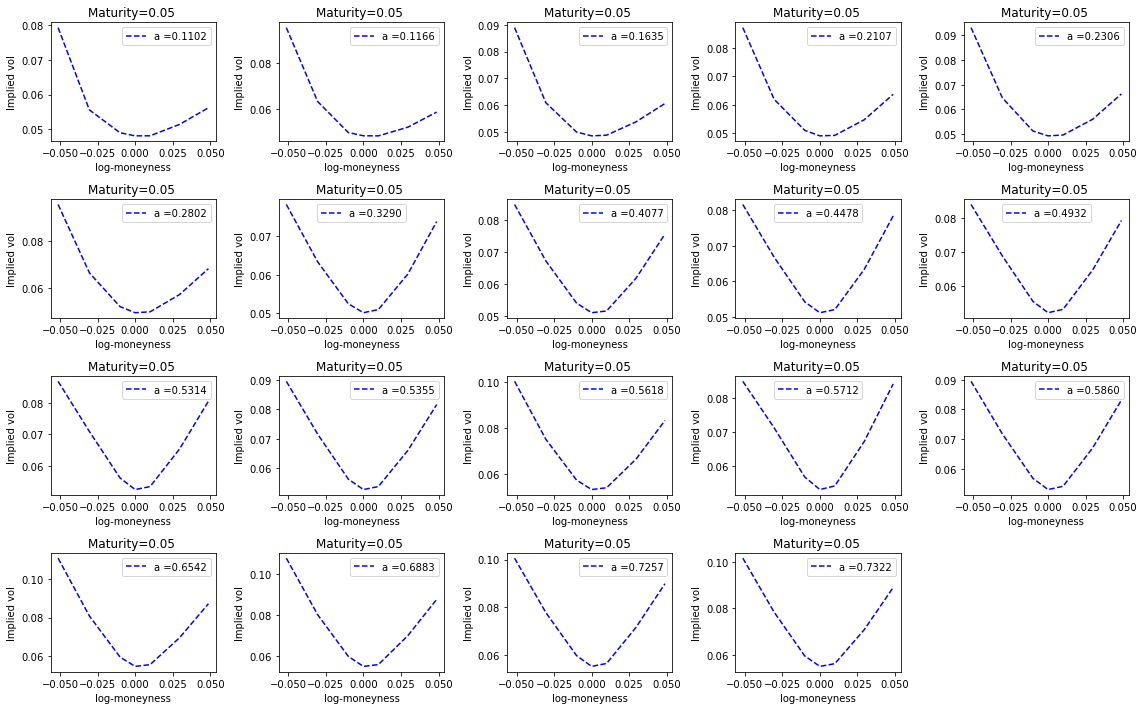

In [90]:
plt.figure(1,figsize=(16,12))
for j in range(len(saved[0])):
    
#     prediction=scale.inverse_transform(modelGEN.predict(X_sample.reshape(1,6))[0])
    plt.subplot(5,5,j+1)
#     print(results_params[j])
    ivs = [i[6:] for i in saved[0]]
    params = [i[:6] for i in saved[0]]
    plt.plot(logmoneyness, ivs[j],'b--',label="a =%.4f"%params[j][2])
    plt.title("Maturity=%1.2f "%maturities[0])
    plt.xlabel("log-moneyness")
    plt.ylabel("Implied vol")

    plt.legend()
    plt.tight_layout()
plt.show()

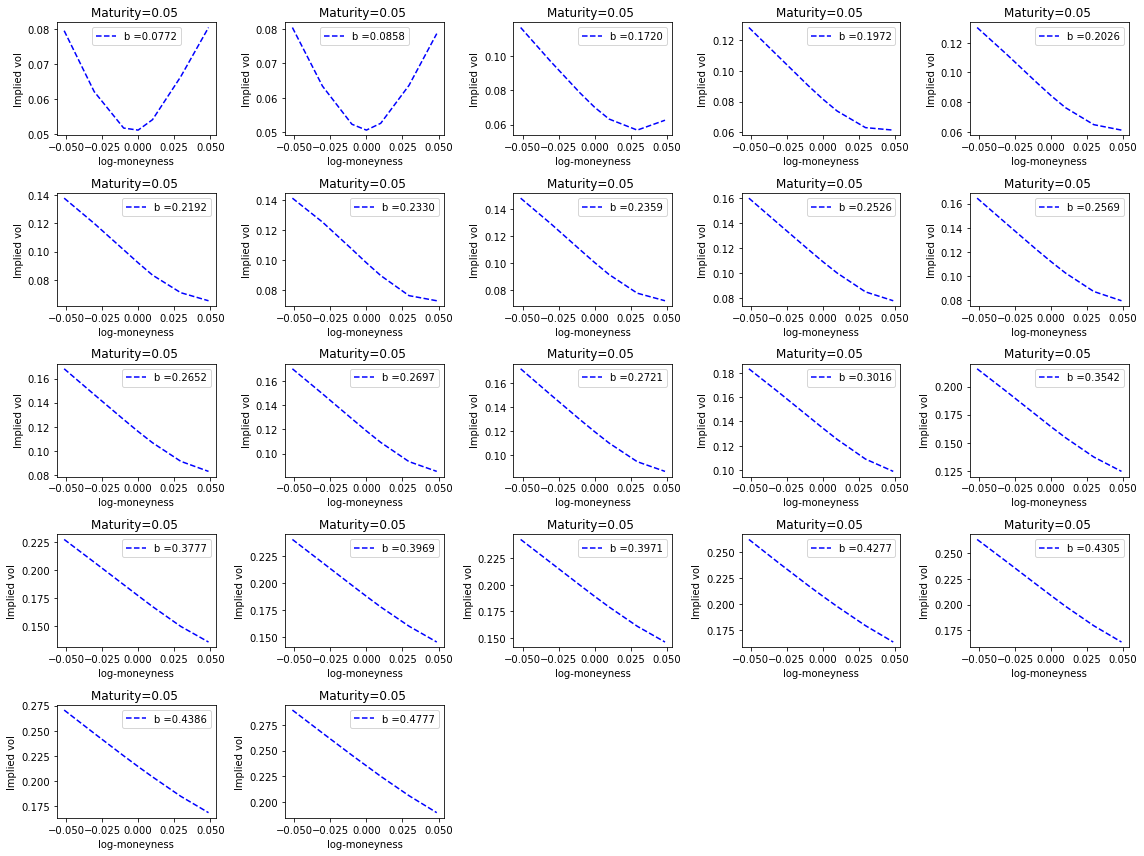

In [101]:
plt.figure(1,figsize=(16,12))
for j in range(len(results_iv)):
    
#     prediction=scale.inverse_transform(modelGEN.predict(X_sample.reshape(1,6))[0])
    plt.subplot(5,5,j+1)
#     print(results_params[j])
    plt.plot(logmoneyness, ivs_sort[j],'b--',label="b =%.4f"%params_sort[j][3])
    plt.title("Maturity=%1.2f "%maturities[0])
    plt.xlabel("log-moneyness")
    plt.ylabel("Implied vol")

    plt.legend()
    plt.tight_layout()
plt.show()

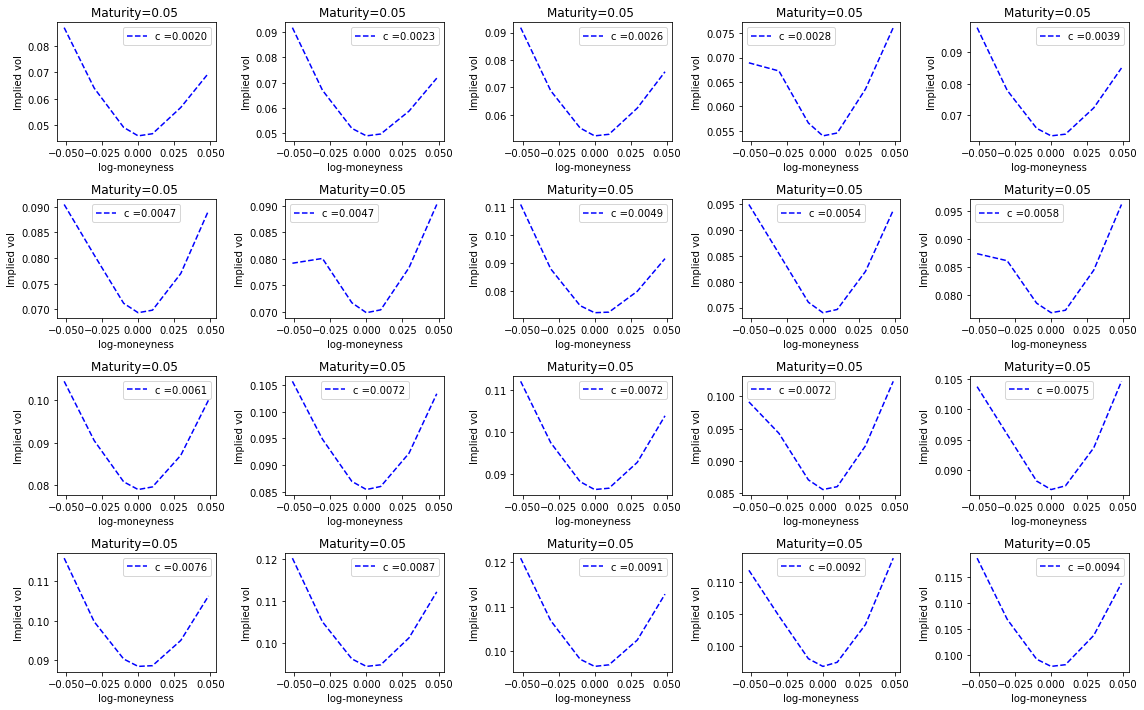

In [114]:
plt.figure(1,figsize=(16,12))
for j in range(len(results_iv)):
#     prediction=scale.inverse_transform(modelGEN.predict(X_sample.reshape(1,6))[0])
    plt.subplot(5,5,j+1)
#     print(results_params[j])
    plt.plot(logmoneyness, ivs_sort[j],'b--',label="c =%.4f"%params_sort[j][4])
    plt.title("Maturity=%1.2f "%maturities[0])
    plt.xlabel("log-moneyness")
    plt.ylabel("Implied vol")

    plt.legend()
    plt.tight_layout()
plt.show()

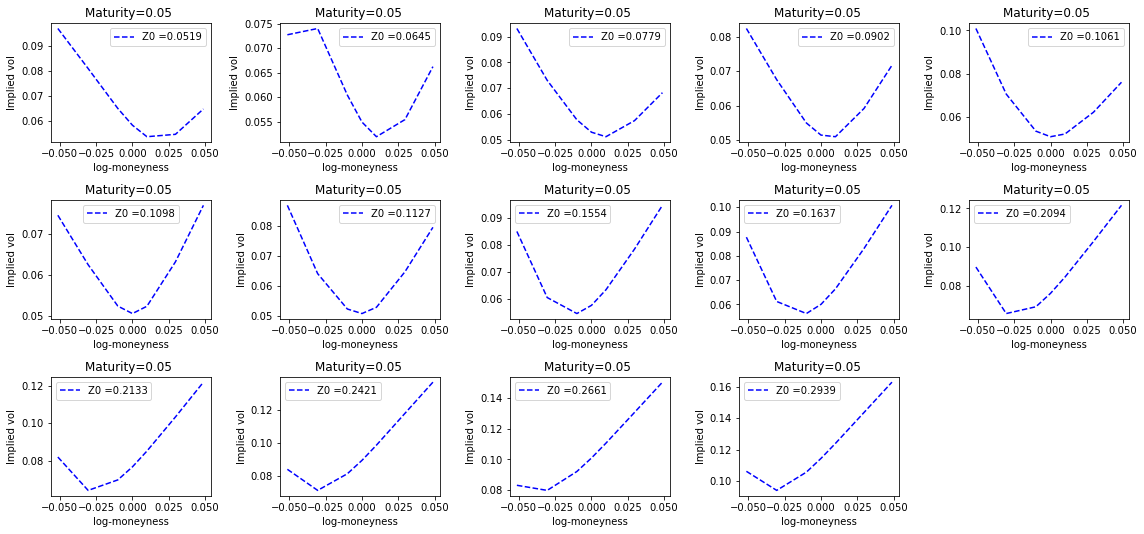

In [123]:
plt.figure(1,figsize=(16,12))
for j in range(len(results_iv)):
    
#     prediction=scale.inverse_transform(modelGEN.predict(X_sample.reshape(1,6))[0])
    plt.subplot(5,5,j+1)
#     print(results_params[j])
    plt.plot(logmoneyness, ivs_sort[j],'b--',label="Z0 =%.4f"%params_sort[j][5])
    plt.title("Maturity=%1.2f "%maturities[0])
    plt.xlabel("log-moneyness")
    plt.ylabel("Implied vol")

    plt.legend()
    plt.tight_layout()
plt.show()

In [174]:
# Read data from file:
data = json.load( open( "fix_parameter_results.json") )


[[0.5055600737418738,
  1.2,
  0.384,
  0.095,
  0.0025,
  0.1,
  0.10156762035212394,
  0.0741631674991349,
  0.056367616817232416,
  0.05250217704375013,
  0.05311500243726237,
  0.064188325167399,
  0.07977658955500906],
 [0.5115919743656429,
  1.2,
  0.384,
  0.095,
  0.0025,
  0.1,
  0.08958192397109054,
  0.06949104421968064,
  0.055239570371929086,
  0.05193693954153927,
  0.05264448304061593,
  0.06299195115484958,
  0.0772068009791226],
 [0.5349365636567427,
  1.2,
  0.384,
  0.095,
  0.0025,
  0.1,
  0.07232724697172657,
  0.06625902832130945,
  0.0539445001856558,
  0.05110930308931479,
  0.051822849361642734,
  0.06189666895435061,
  0.07628933892137288],
 [0.5567021718170614,
  1.2,
  0.384,
  0.095,
  0.0025,
  0.1,
  0.07620133735307968,
  0.06394202915013691,
  0.052928146710367996,
  0.05042553465540817,
  0.05109886801409789,
  0.05972072278458576,
  0.07208693800944281],
 [0.5777482805989653,
  1.2,
  0.384,
  0.095,
  0.0025,
  0.1,
  0.09296147604867405,
  0.067170

Varying parameter : alpha


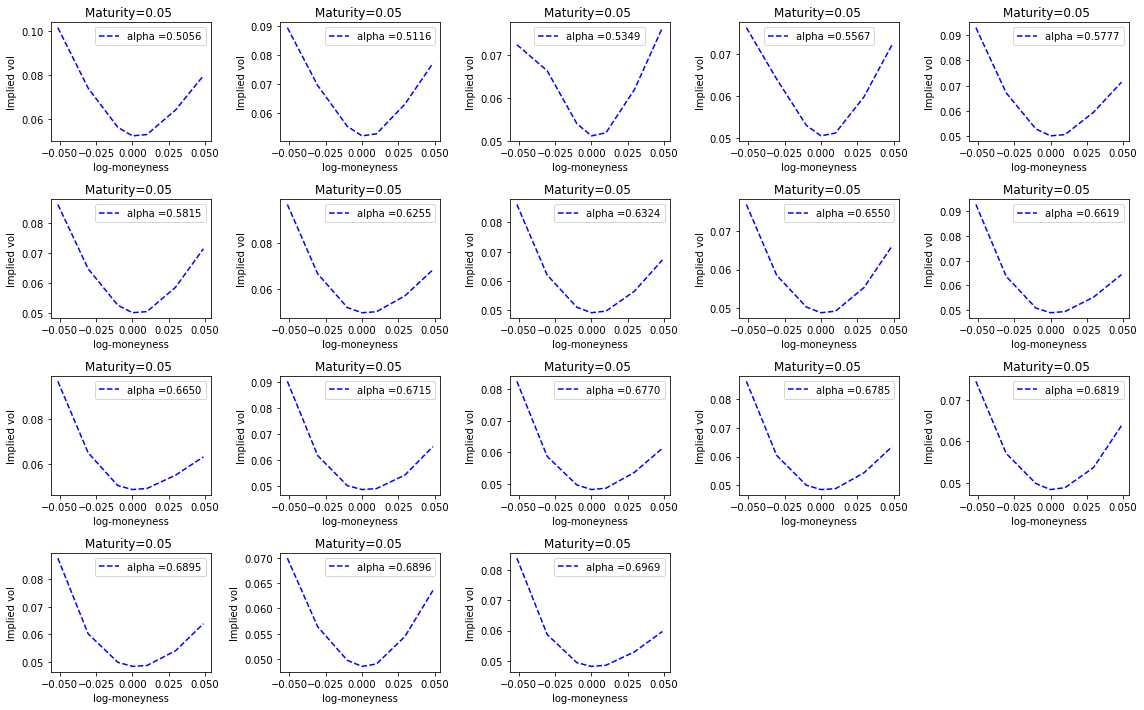

Varying parameter : lambda


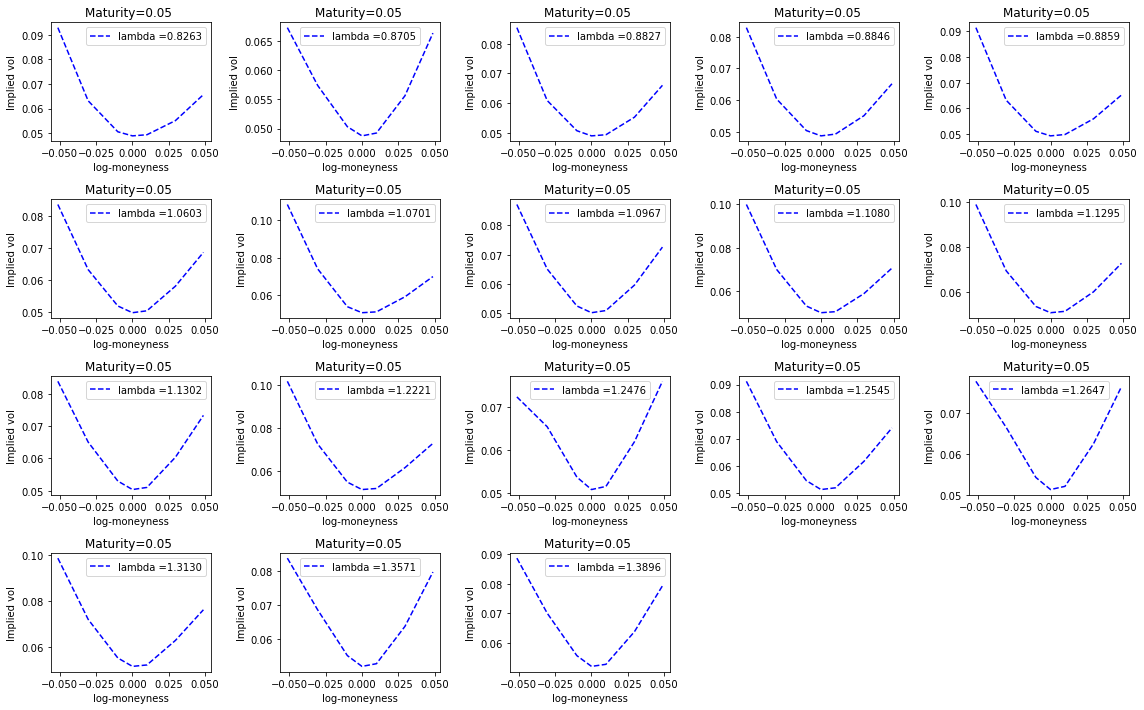

Varying parameter : a


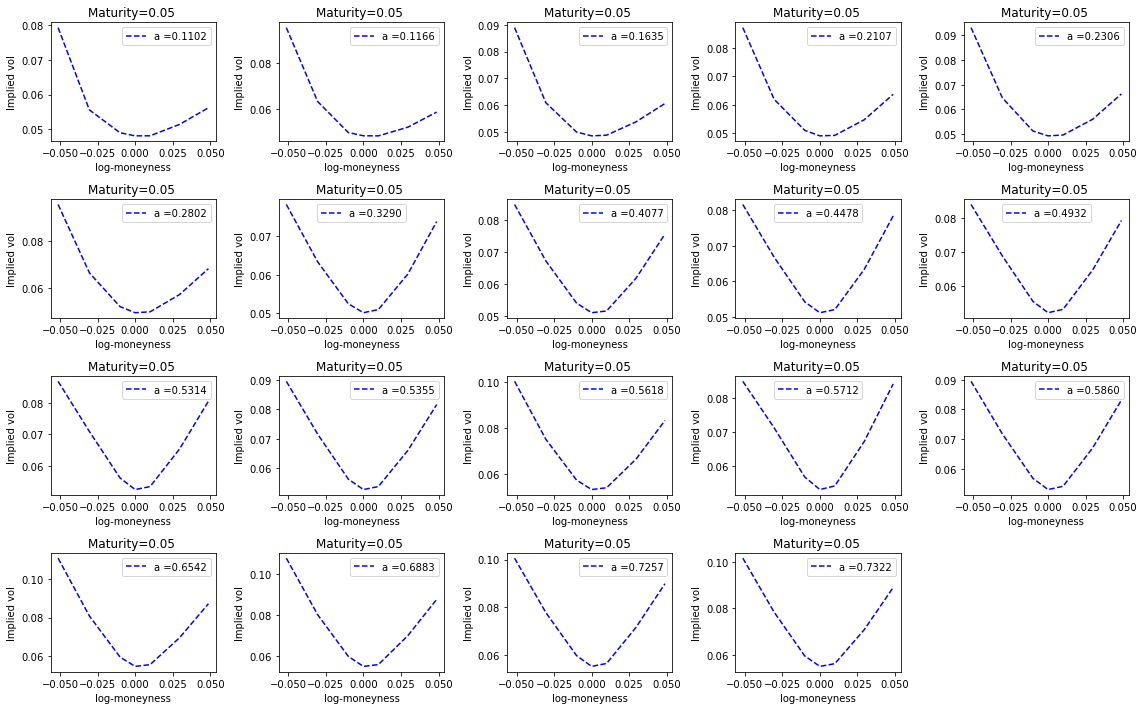

Varying parameter : b


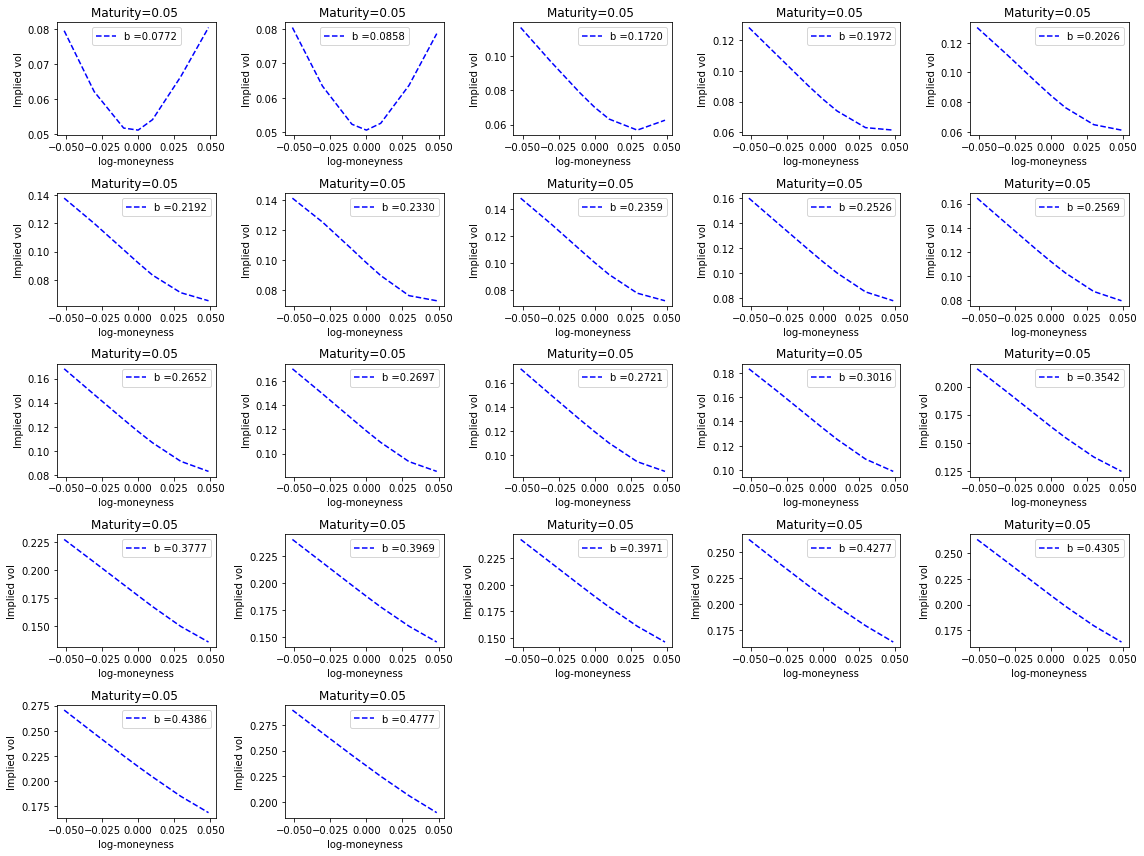

Varying parameter : c


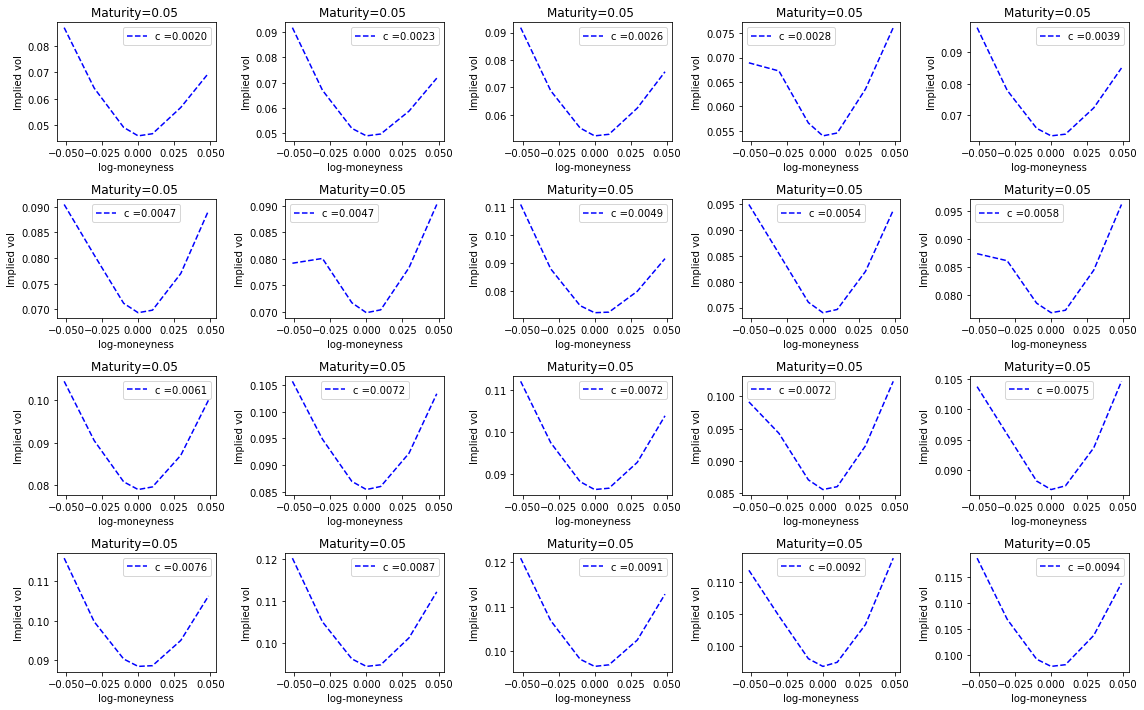

Varying parameter : Z0


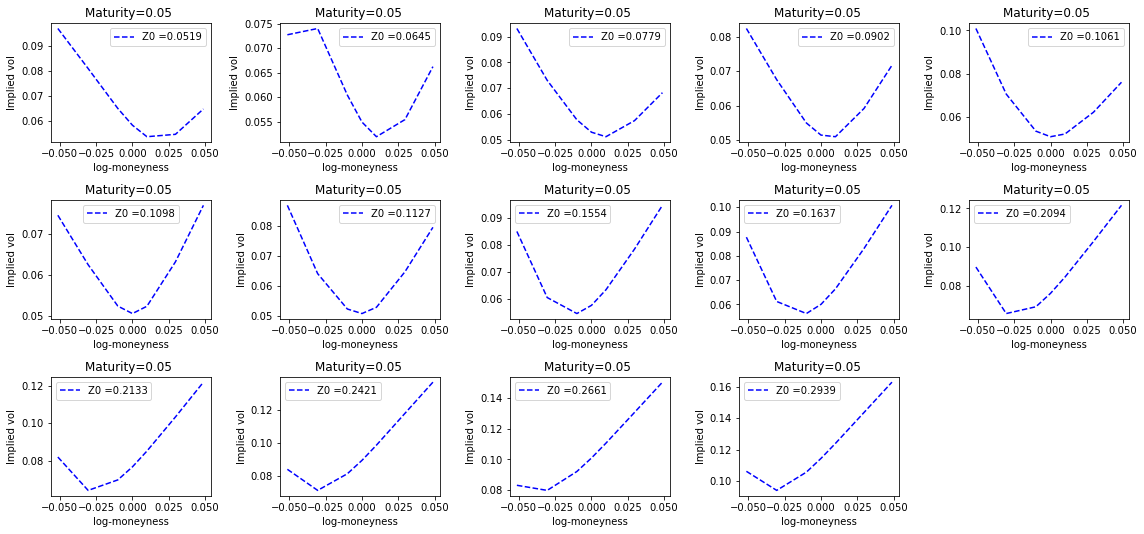

In [179]:
params = ['alpha', 'lambda', 'a', 'b', 'c', 'Z0']

for i in range(len(data)):
    print("Varying parameter :",params[i])
    params_ivs = data[i]
    f = plt.figure(i,figsize=(16,12))
    for j in range(len(params_ivs)):
        ivs_ = [tmp[6:] for tmp in params_ivs]
        params_ = [tmp[:6] for tmp in params_ivs]
        
    #     prediction=scale.inverse_transform(modelGEN.predict(X_sample.reshape(1,6))[0])
        plt.subplot(5,5,j+1)
    #     print(results_params[j])
        plt.plot(logmoneyness, ivs_[j],'b--',label="%s =%.4f"%(params[i],params_[j][i]))
        plt.title("Maturity=%1.2f "%maturities[0])
        plt.xlabel("log-moneyness")
        plt.ylabel("Implied vol")

        plt.legend()
        plt.tight_layout()
        f.savefig("varying_parameter_%s"%params[i])
    plt.show() 

### Observation:
1. With other parameters fixed, we observe that the smile is larger(less sharp at the bottom) with increasing $\alpha$;
2. With other parameters fixed, we observe that the smile is narrower(shaper) with increasing $\lambda$;
3. With other parameters fixed, we observe that the smile is sharper with increasing $a$;
4. With other parameters fixed, we observe that the smile is shaper with increasing $b$;
5. With other parameters fixed, we did not observe obvious difference with increasing $c$;
6. With other parameters fixed, we observe that the skew direction changes with increasing $Z_0$.

Varying parameter : alpha


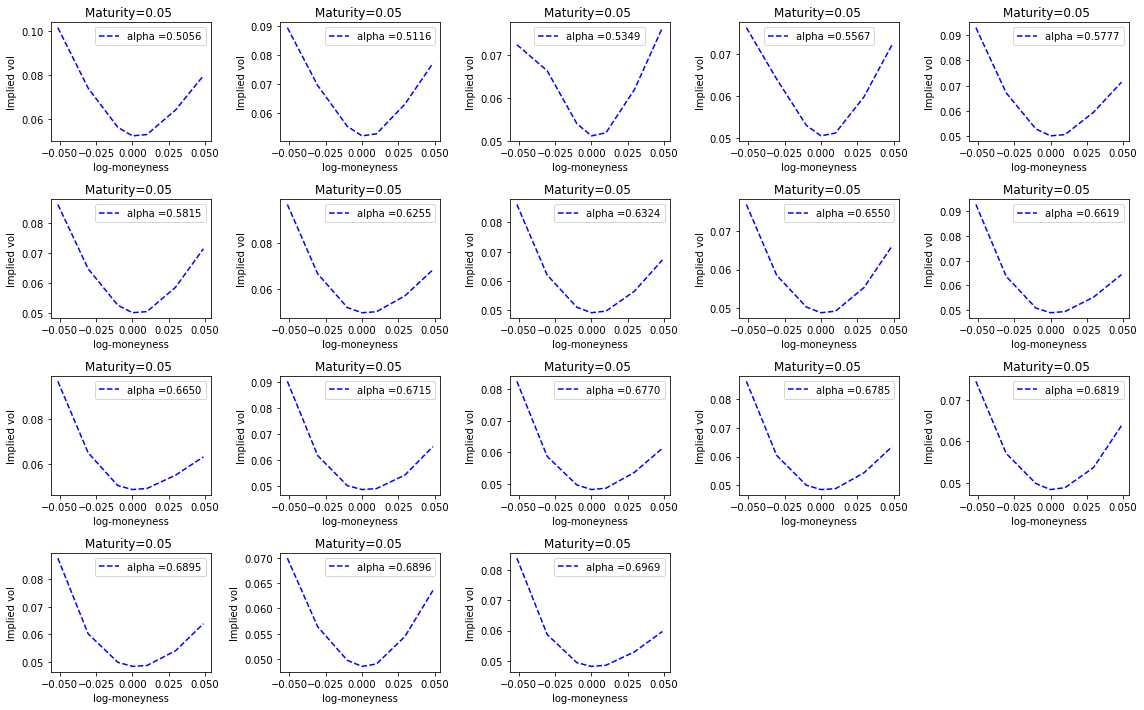

Varying parameter : lambda


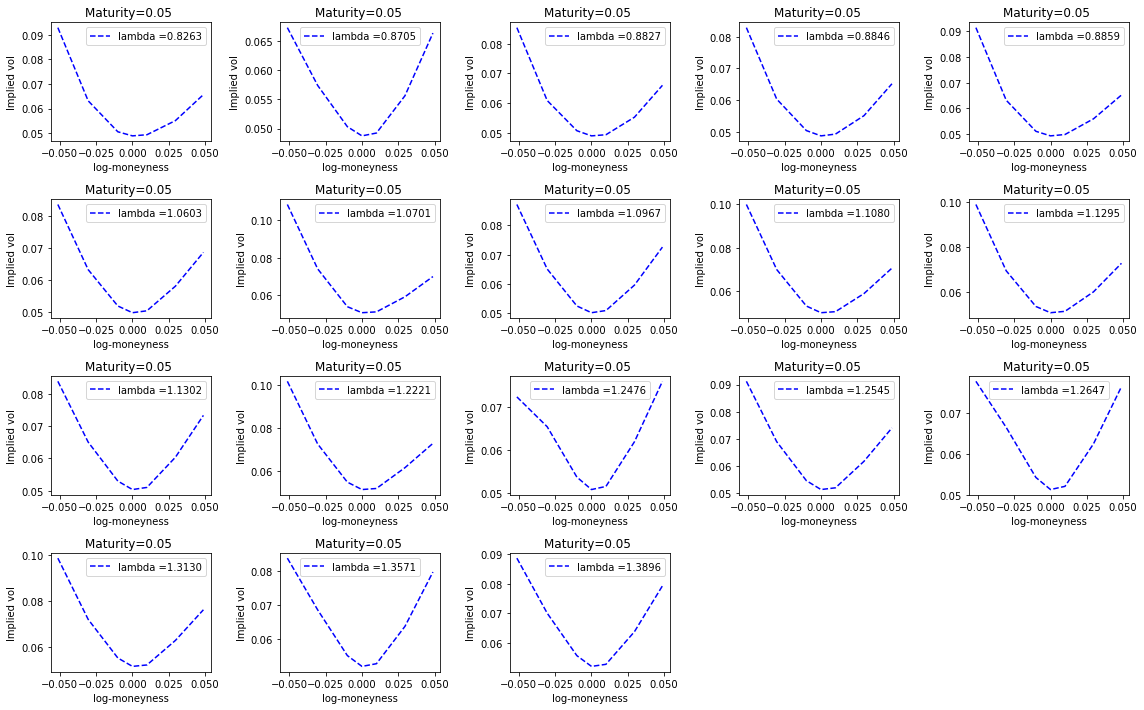

Varying parameter : a


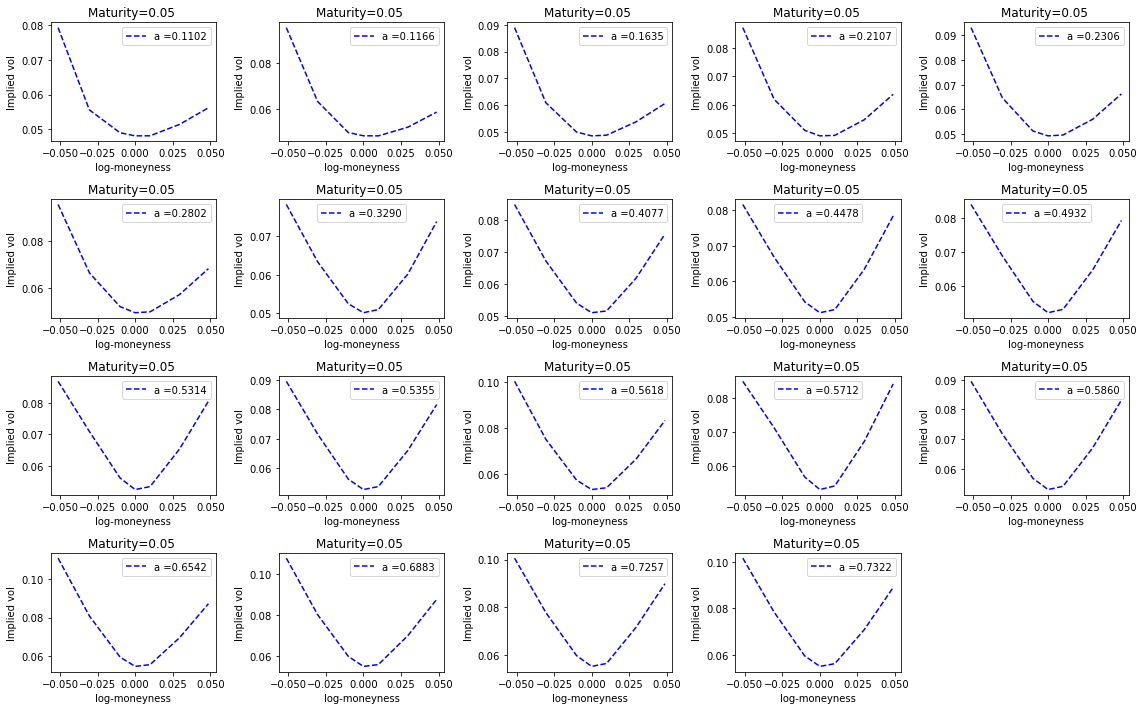

Varying parameter : b


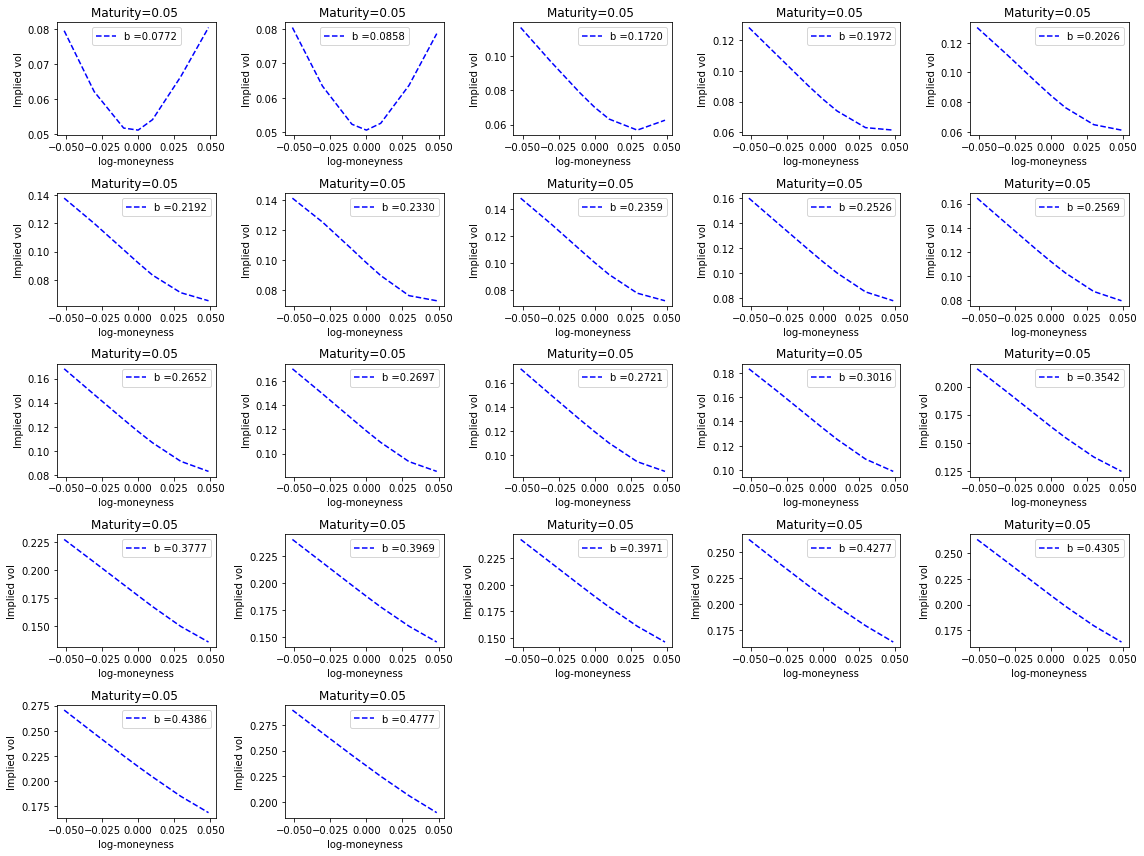

Varying parameter : c


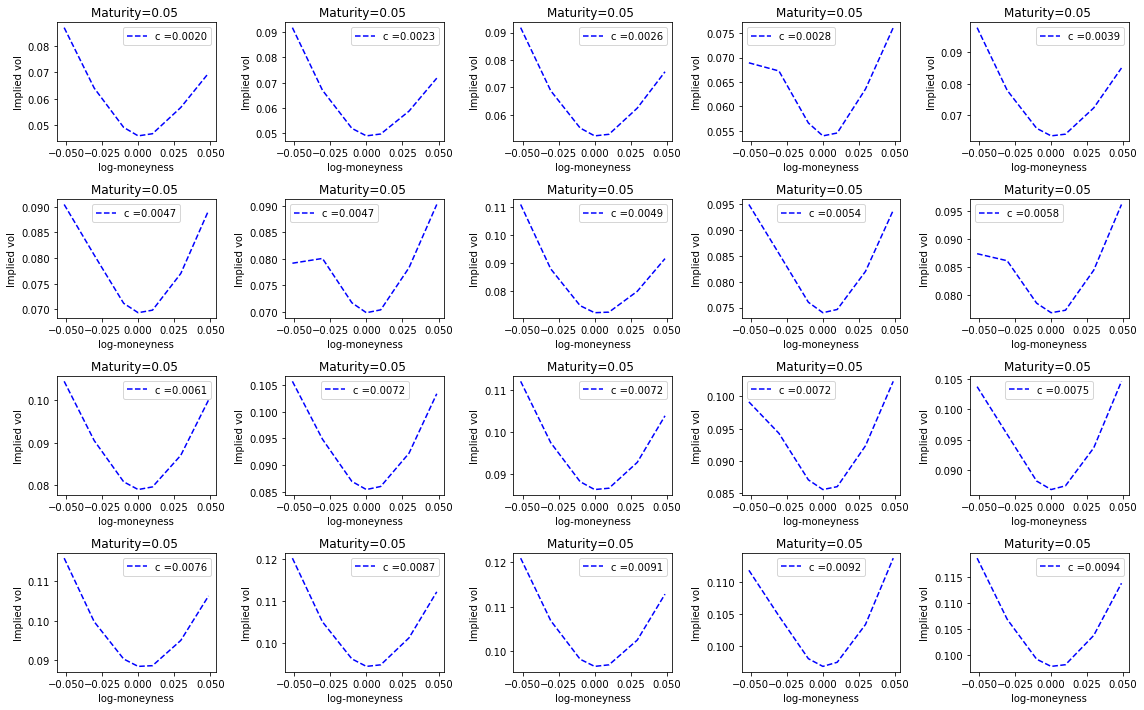

Varying parameter : Z0


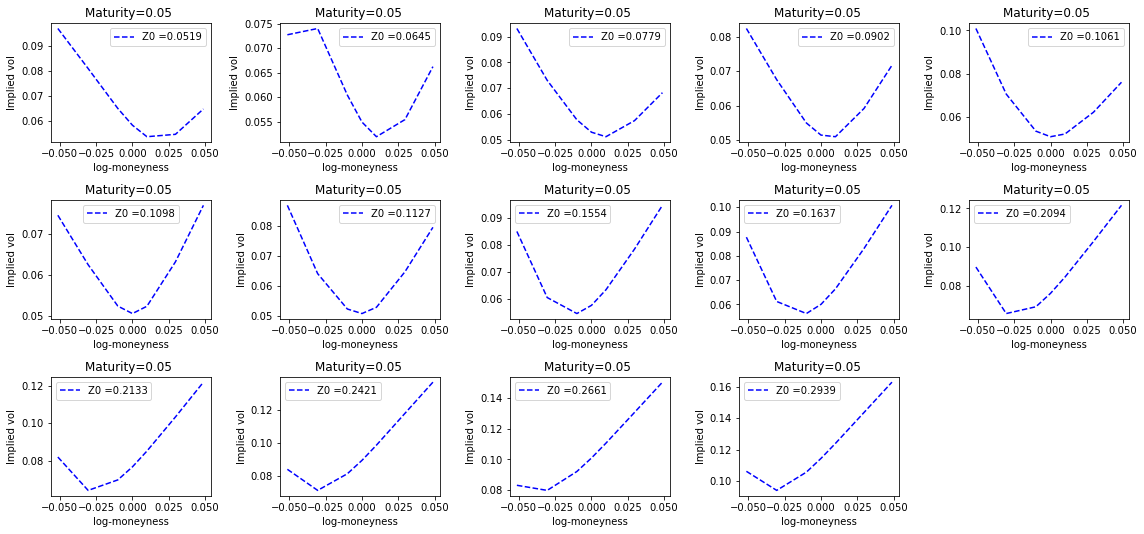

In [182]:
params = ['alpha', 'lambda', 'a', 'b', 'c', 'Z0']

for i in range(len(data)):
    print("Varying parameter :",params[i])
    params_ivs = data[i]
    f = plt.figure(i,figsize=(16,12))
    for j in range(len(params_ivs)):
        ivs_ = [tmp[6:] for tmp in params_ivs]
        params_ = [tmp[:6] for tmp in params_ivs]
        
    #     prediction=scale.inverse_transform(modelGEN.predict(X_sample.reshape(1,6))[0])
        plt.subplot(5,5,j+1)
    #     print(results_params[j])
        plt.plot(logmoneyness, ivs_[j],'b--',label="%s =%.4f"%(params[i],params_[j][i]))
        plt.title("Maturity=%1.2f "%maturities[0])
        plt.xlabel("log-moneyness")
        plt.ylabel("Implied vol")

        plt.legend()
        plt.tight_layout()
        f.savefig("varying_parameter_%s"%params[i])
    plt.show() 

In [ ]:
c